In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips['tip'].loc[4]

3.61

In [5]:
tips[['total_bill','tip']].loc[4].mean()

14.1

In [6]:
ttt = tips[['total_bill','tip']]


In [7]:
ttt.loc[4].idxmin()
ttt.nlargest

<bound method DataFrame.nlargest of      total_bill   tip
0         16.99  1.01
1         10.34  1.66
2         21.01  3.50
3         23.68  3.31
4         24.59  3.61
..          ...   ...
239       29.03  5.92
240       27.18  2.00
241       22.67  2.00
242       17.82  1.75
243       18.78  3.00

[244 rows x 2 columns]>

In [8]:
from pandas_profiling import ProfileReport
prof = ProfileReport(tips)
prof.to_file(output_file='tips.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [124]:
train = pd.read_csv('train.csv')

In [11]:
from pandas_profiling import ProfileReport
prof = ProfileReport(train)
prof.to_file(output_file='train.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [13]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,True,False
99997,False,False,False,False,False,False,False,False,True,False,True,False
99998,False,False,False,False,False,False,False,False,False,False,True,False


<AxesSubplot:>

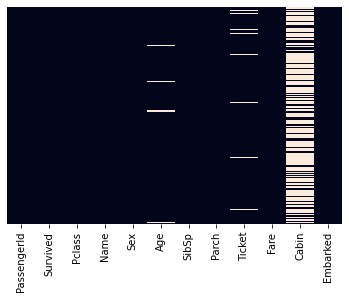

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [15]:
train.isnull().query('Age==True')['Age'].size

3292

In [16]:
train.isnull().query('Age==True')['Age'].size/100000*100

3.292

In [17]:
train.isnull().query('Ticket==True')['Ticket'].size

4623

In [18]:
train.isnull().query('Ticket==True')['Ticket'].size/100000*100

4.623

In [19]:
train.isnull().query('Cabin==True')['Cabin'].size

67866

In [20]:
train.isnull().query('Cabin==True')['Cabin'].size/100000*100

67.866

In [21]:
train.isnull().query('Embarked==True')['Embarked'].size

250

<AxesSubplot:xlabel='Survived', ylabel='count'>

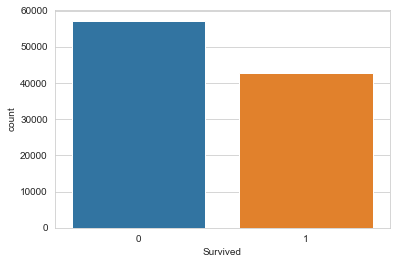

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

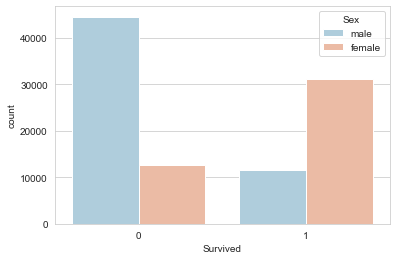

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

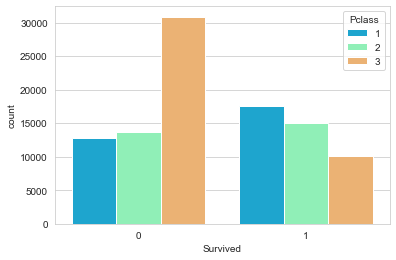

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train,palette='rainbow')

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

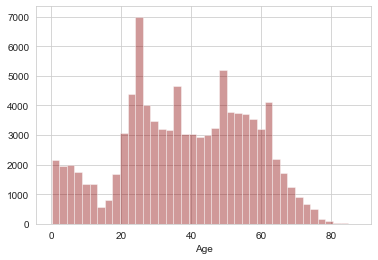

In [25]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

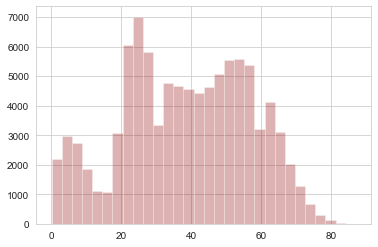

In [26]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

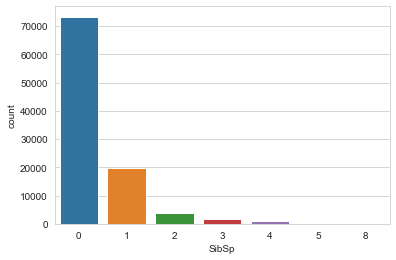

In [27]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

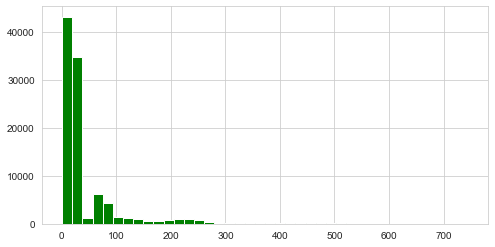

In [28]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

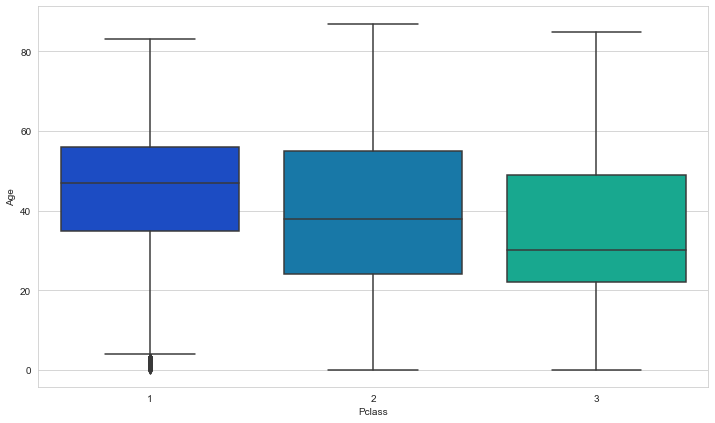

In [29]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [30]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 45
        elif Pclass == 2:
            return 39
        else:
            return 33
    return Age

In [31]:
train[train['Pclass']==1]['Fare'].mean()

92.65311345995045

In [32]:
train[train['Pclass']==2]['Fare'].mean()

25.756003422146176

In [33]:
train[train['Pclass']==3]['Fare'].mean()

20.618226058504664

In [34]:
train['Age'] = train[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

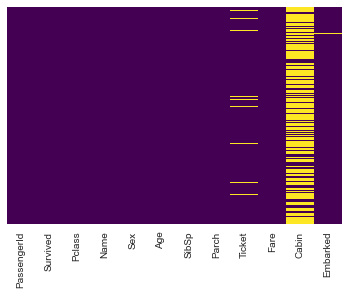

In [35]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

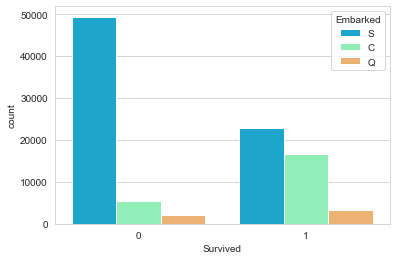

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked', data=train,palette='rainbow')

In [38]:
def input_Embarked(col):
    Em = col[0]
    if pd.isnull(Em):
        return 'S'
    return Em

In [39]:
train['Embarked'] = train[['Embarked','Pclass']].apply(input_Embarked,axis=1)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          100000 non-null  float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Embarked     100000 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 6.9+ MB


In [41]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [48]:
key = ['Ticket', 'Name','Age']
train_dedupped = train.drop_duplicates(subset=key)
print(train.shape)
print(train_dedupped.shape)



(100000, 11)
(100000, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [53]:
print(train[train['Survived']==1].shape[0])

42774


In [57]:
print(100000-train[train['Sex']=='male'].shape[0])

43886


In [60]:
print(train[(train['Survived']==1)&(train['Sex']=='male')].shape[0])

11548


In [64]:
print(train[(train['Survived']==1)&(train['Sex']!='male')].shape[0])


31226


Text(0.5, 1.0, 'Выживаемость в зависимости от пола и возраста')

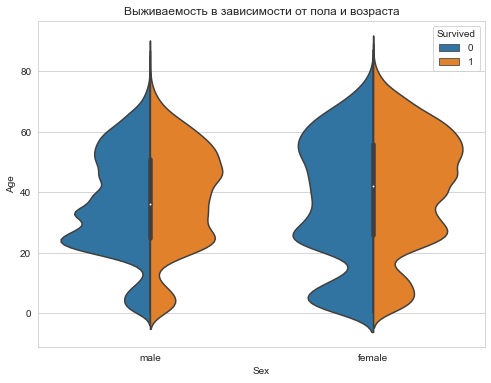

In [65]:
fig = plt.figure(figsize=(8, 6))
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = train, split = True).set_title('Выживаемость в зависимости от пола и возраста')


36.62560449670152

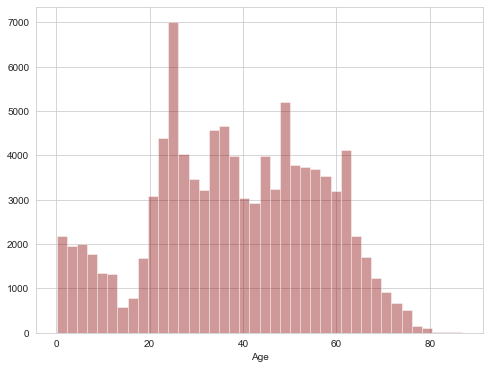

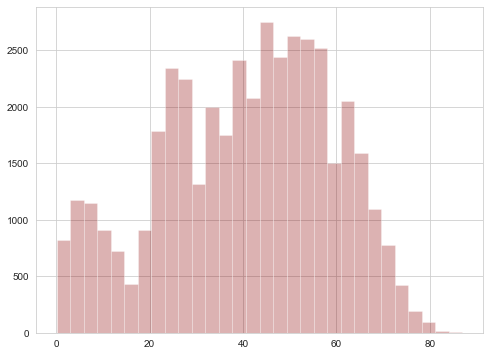

In [78]:
# Возраст и пол
fig = plt.figure(figsize=(8, 6))
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

fig = plt.figure(figsize=(8, 6))
train[train['Survived']==1]['Age'].hist(bins=30,color='darkred',alpha=0.3)

train[(train['Survived']!=1)&(train['Sex']=='male')]['Age'].mean()


<AxesSubplot:xlabel='Survived', ylabel='count'>

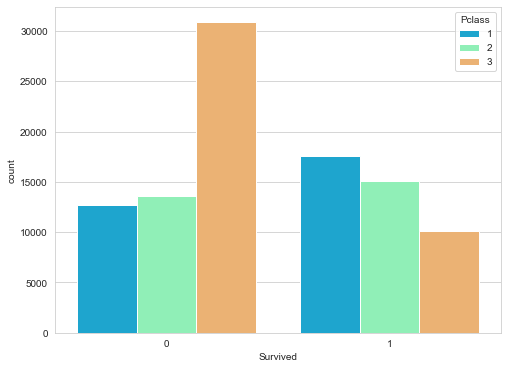

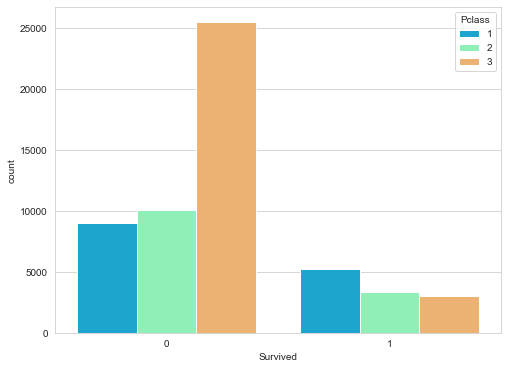

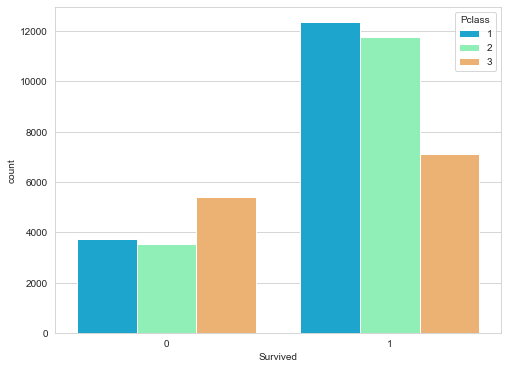

In [86]:
# Класс каюты
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8, 6))
sns.countplot(x='Survived',hue='Pclass', data=train,palette='rainbow')
fig = plt.figure(figsize=(8, 6))
sns.countplot(x='Survived',hue='Pclass', data=train[train['Sex']=='male'],palette='rainbow')
fig = plt.figure(figsize=(8, 6))
sns.countplot(x='Survived',hue='Pclass', data=train[train['Sex']!='male'],palette='rainbow')

# fig = plt.figure(figsize=(8, 6))
# group = train.groupby(['Pclass', 'Survived'])
# pclass_survived = group.size().unstack()
# sns.heatmap(pclass_survived, annot = True, fmt ="d")

# fig = plt.figure(figsize=(8, 6))
# sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = train, split = True)



In [97]:
print(train[(train['Survived']==1)&(train['Pclass']==3)].shape[0])

10141


In [98]:
print(train[(train['Pclass']==3)].shape[0])

41006


In [99]:
print(train[(train['Survived']==1)&(train['Pclass']==3)].shape[0]/train[(train['Pclass']==3)].shape[0]*100)

24.730527239916107


In [105]:
train[train['Pclass'] == 3]['Fare'].mean()

20.618226058504664

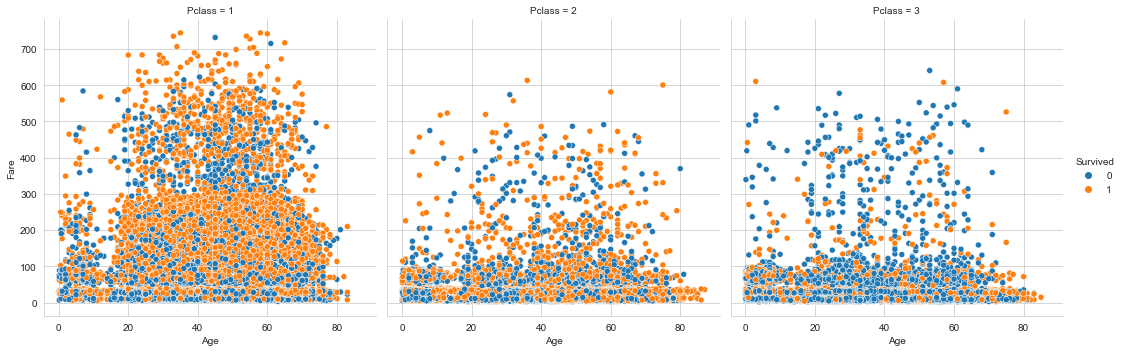

In [109]:
sns.relplot(
    data=train,
    x="Age", y="Fare", col="Pclass",
    hue="Survived")

In [111]:
# sns.relplot(
#     data=train, kind="line",
#     x="Age", y="Fare", col="Pclass",
#     hue="Survived", size="Fare",
#     facet_kws=dict(sharex=False),
# )

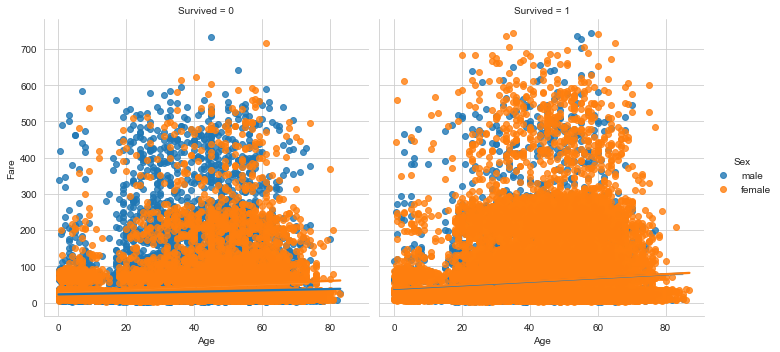

In [112]:
sns.lmplot(data=train, x="Age", y="Fare", col="Survived", hue="Sex")

In [ ]:
# Ticket
# train

<Figure size 576x432 with 0 Axes>

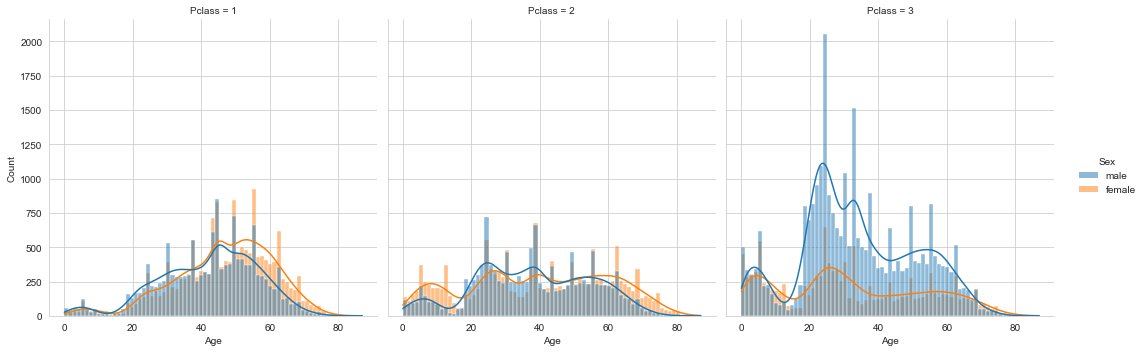

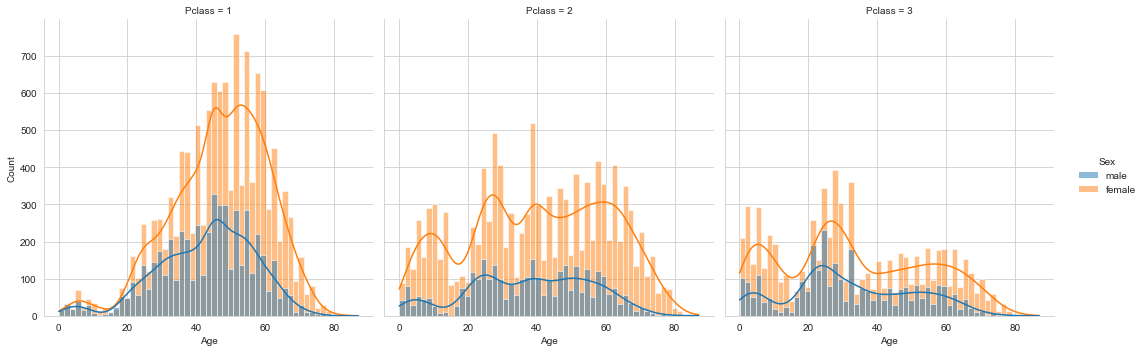

In [118]:
# Возраст по классам
fig = plt.figure(figsize=(8, 6))
sns.displot(data=train, x="Age", col="Pclass", hue = 'Sex', kde=True)
sns.displot(data=train[train['Survived']==1], x="Age", col="Pclass", hue = 'Sex', kde=True)



PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

PassengerId - 0.0%
Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 3.29%
SibSp - 0.0%
Parch - 0.0%
Ticket - 4.62%
Fare - 0.13%
Cabin - 67.87%
Embarked - 0.25%

(100000, 11)
(100000, 11)
         PassengerId       Survived         Pclass           Age  \
count  100000.000000  100000.000000  100000.000000  100000.00000   
mean    49999.500000       0.427740       2.106910      38.35149   
std     28867.657797       0.494753       0.837727      18.03248   
min         0.000000       0.000000       1.000000       0.08000   
25%     24999.750000       0.000000       1.000000      25.00000   
50%     49999.500000       0.000000       2.000000      39.00000   
75%     74999.250000       1.000000       3.000000      53.00

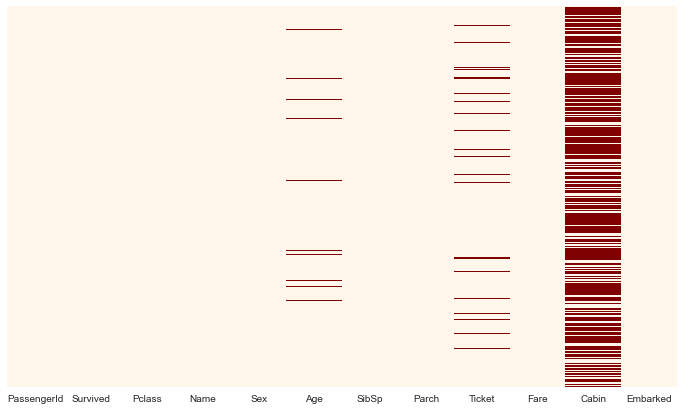

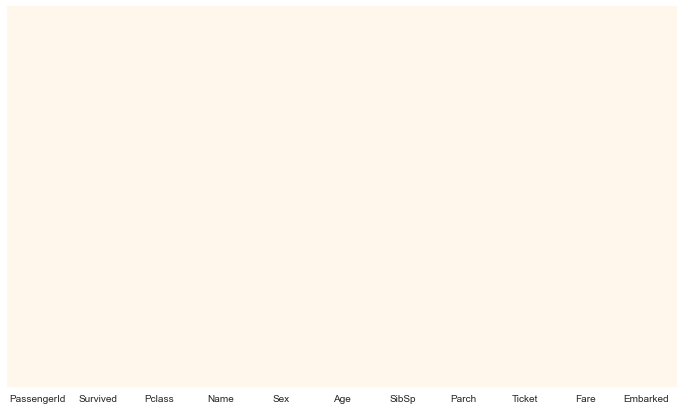

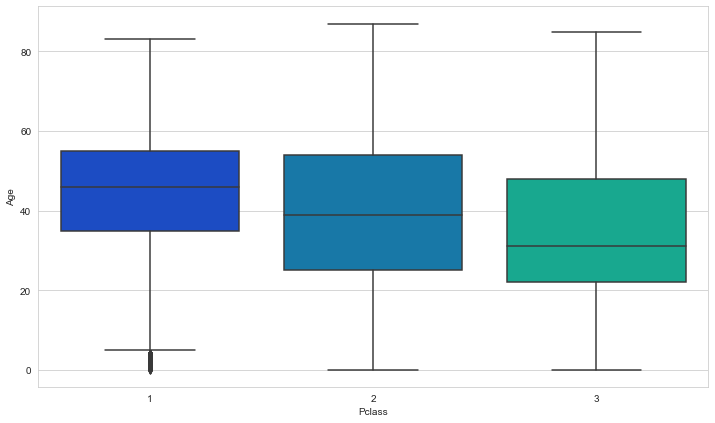

In [127]:
# 1. Анализ незаполненных данных
# 1.1. Количество незаполненных значений по столбцам
print(train.isnull().sum())
print()
# 1.2. Процент незаполненных значений по столбцам
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))
print()
# 1.3. График незаполненных значений по столбцам
plt.figure(figsize=(12,7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='OrRd')
# 1.4. Заполнение Age, Ticket, Fare, Embarked, Удаление Cabin
def input_Age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 45
        elif Pclass == 2:
            return 39
        else:
            return 33
    return Age
train['Age'] = train[['Age','Pclass']].apply(input_Age,axis=1)
train['Ticket'] = train['Ticket'].fillna('000000')
f1 = round(train[train['Pclass']==1]['Fare'].mean(),2)
f2 = round(train[train['Pclass']==2]['Fare'].mean(),2)
f3 = round(train[train['Pclass']==3]['Fare'].mean(),2)

def input_Fare(cols, f1, f2, f3):
    Fare = cols[0]
    Pclass = cols[1]
    if pd.isnull(Fare):
        if Pclass == 1:
            return f1
        elif Pclass == 2:
            return f2
        else:
            return f3
    return Fare
train['Fare'] = train[['Fare','Pclass']].apply(input_Fare,axis=1, args=[f1,f2,f3])

def input_Embarked(col):
    Em = col[0]
    if pd.isnull(Em):
        return 'S'
    return Em
train['Embarked'] = train[['Embarked','Pclass']].apply(input_Embarked,axis=1)
train.drop('Cabin',axis=1,inplace=True)
# Проверка
plt.figure(figsize=(12,7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='OrRd')
# 1.5. 
# 2. Выбросы
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
# Выбросов нет, в том числе после анализа describe()

# 3. Дубли
key = ['Ticket', 'Name','Age']
train_dedupped = train.drop_duplicates(subset=key)
print(train.shape)
print(train_dedupped.shape)
# Дубликатов по имени нет

# 4. Перевод категориальных переменных в числовые
# Пол
def is_male(sex):
    if sex == 'male':
        return 0
    else:
        return 1
# Порт отправления
def em_in_num(Em):
    if Em == 'S':
        return 0
    elif Em == 'C':
        return 1
    else:
        return 2
train['SexNum'] = train.apply(lambda x: is_male(x['Sex']), axis =  1)
train['EmbarkedNum'] = train.apply(lambda x: em_in_num(x['Embarked']), axis =  1)
print(train.describe())


<AxesSubplot:>

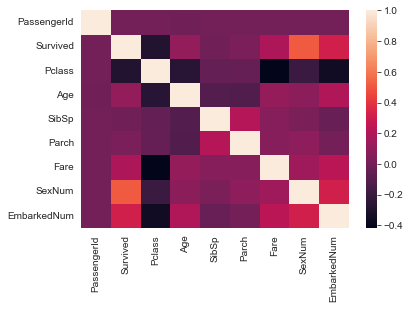

In [129]:
corr = train.corr()
# corr.head()
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr)